In [1]:
%%time
cycle_share = pd.read_csv('cycle_share.csv')

<string>:2: DtypeWarning: Columns (21,39) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 2.67 s, sys: 570 ms, total: 3.24 s
Wall time: 5.94 s


In [2]:
%%time
cycle_share = pd.read_csv('cycle_share.csv')

Wall time: 8.86 s


<string>:2: DtypeWarning:

Columns (21,39) have mixed types. Specify dtype option on import or set low_memory=False.



In [1]:
%%time
from __future__ import division
from __future__ import print_function

import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

from patsy import dmatrix, dmatrices

import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 70

import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

import plotly.plotly as py
from plotly.offline import init_notebook_mode
import pandas as pd
import plotly 
# plotly.tools.set_credentials_file(username='shinv1234', api_key='JsLYlUmrIt3NHNWGhbwV')
plotly.tools.set_config_file(world_readable=False, sharing='private')
init_notebook_mode(connected=True)

Wall time: 16.8 s


In [4]:
cycle_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236060 entries, 0 to 236059
Data columns (total 65 columns):
trip_id                       236060 non-null int64
starttime                     236060 non-null object
stoptime                      236060 non-null object
bikeid                        236060 non-null object
tripduration                  236060 non-null float64
from_station_name             236060 non-null object
to_station_name               236060 non-null object
from_station_id               236060 non-null object
to_station_id                 236060 non-null object
usertype                      236060 non-null object
gender                        146168 non-null object
age                           146164 non-null float64
Date                          236060 non-null object
station_id                    236060 non-null object
name                          236060 non-null object
lat                           236060 non-null float64
long                          236060 no

In [10]:
cycle_share.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,Date,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,from_station_area,day,weekend,from_station_area[BT],from_station_area[CBD],from_station_area[CD],from_station_area[CH],from_station_area[DPD],from_station_area[EL],from_station_area[FH],from_station_area[ID],from_station_area[PS],from_station_area[SLU],from_station_area[UD],from_station_area[UW],from_station_area[WF],Gender_F,Gender_M,Gender_O,Rain,Snow,Thunderstorm,Fog
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,57.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,47.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,29.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,40.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0


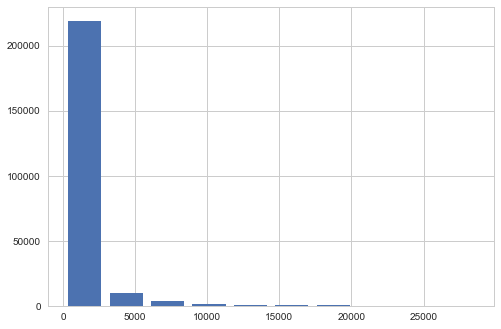

In [11]:
plt.hist(cycle_share['tripduration'], rwidth=0.8)
plt.show()

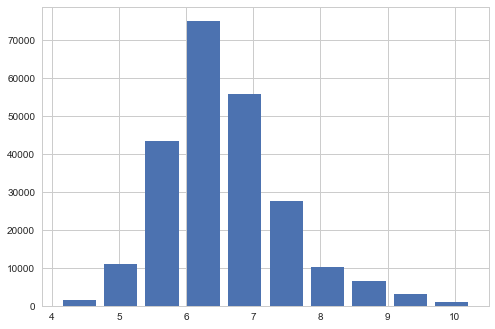

In [10]:
plt.hist(np.log(cycle_share['tripduration']), rwidth=0.8)
plt.show()

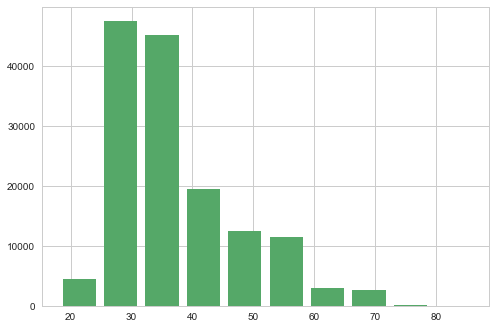

In [17]:
plt.hist(cycle_share['age'][~cycle_share['age'].isnull()], rwidth=0.8)
plt.show()

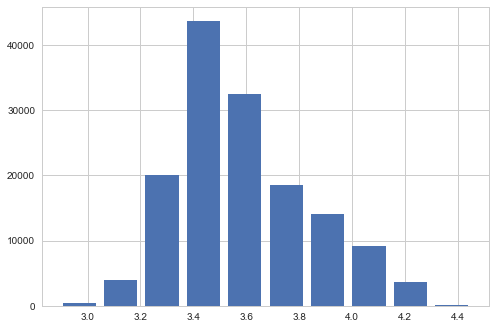

In [18]:
plt.hist(np.log(cycle_share['age'][~cycle_share['age'].isnull()]), rwidth=0.8)
plt.show()

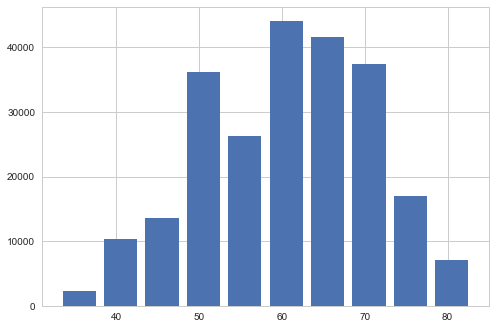

In [21]:
plt.hist(cycle_share['Mean_Temperature_F'][~cycle_share['Mean_Temperature_F'].isnull()], rwidth=0.8)
plt.show()

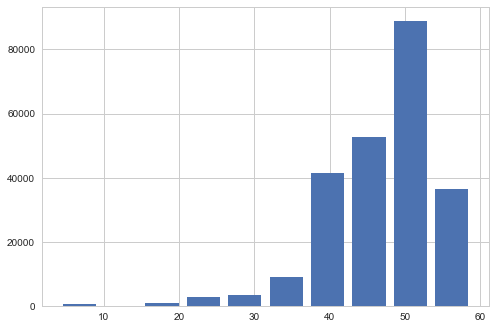

In [31]:
plt.hist(cycle_share['MeanDew_Point_F'], rwidth=0.8)
plt.show()

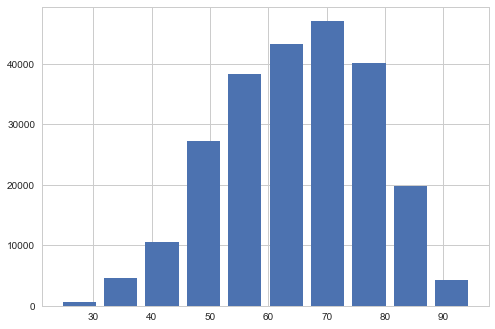

In [33]:
plt.hist(cycle_share['Mean_Humidity'], rwidth=0.8)
plt.show()

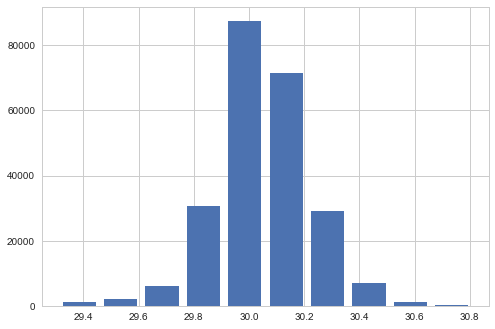

In [34]:
plt.hist(cycle_share['Mean_Sea_Level_Pressure_In'], rwidth=0.8)
plt.show()

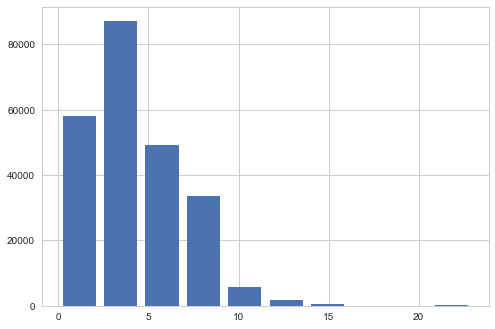

In [35]:
plt.hist(cycle_share['Mean_Wind_Speed_MPH'], rwidth=0.8)
plt.show()

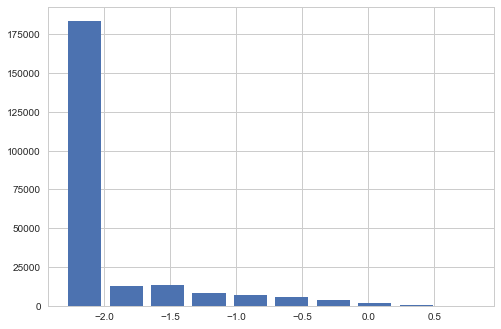

In [44]:
plt.hist(np.log(0.1 + cycle_share['Precipitation_In']), rwidth=0.8)
plt.show()

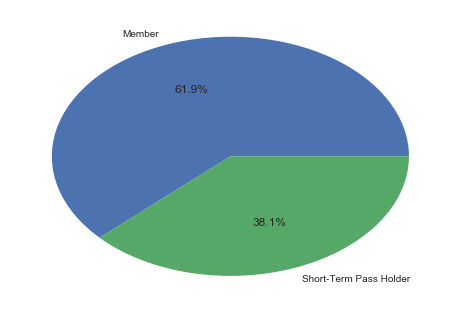

In [61]:
plt.pie(cycle_share.usertype.value_counts(), 
        labels=cycle_share.usertype.value_counts().index, 
        autopct='%1.1f%%')
plt.show()

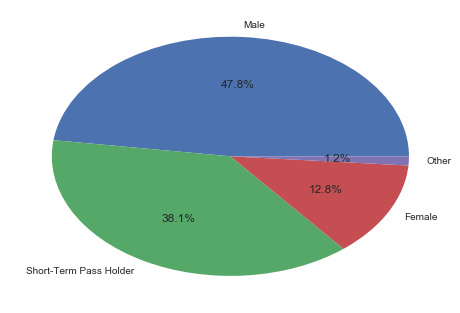

Male                      112938
Short-Term Pass Holder     89892
Female                     30329
Other                       2901
Name: gender, dtype: int64


In [99]:
cycle_share.gender.replace(to_replace=np.nan, value='Short-Term Pass Holder').value_counts()
plt.pie(cycle_share.gender.replace(to_replace=np.nan, value='Short-Term Pass Holder').value_counts(), 
        labels=cycle_share.gender.replace(to_replace=np.nan, value='Short-Term Pass Holder').value_counts().index, 
        autopct='%1.1f%%')
plt.show()
print(cycle_share.gender.replace(to_replace=np.nan, value='Short-Term Pass Holder').value_counts())

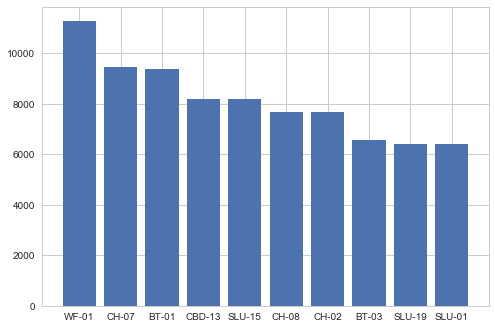

        from_station_id
WF-01             11274
CH-07              9466
BT-01              9392
CBD-13             8198
SLU-15             8188
CH-08              7690
CH-02              7685
BT-03              6568
SLU-19             6402
SLU-01             6401


In [97]:
plt.bar([i for i in range(len(cycle_share.from_station_id.value_counts()[:10]))], 
        cycle_share.from_station_id.value_counts()[:10], 
        align='center')
plt.xticks([i for i in range(len(cycle_share.from_station_id.value_counts()[:10]))], 
           cycle_share.from_station_id.value_counts()[:10].index)
plt.show()
print(pd.DataFrame(cycle_share.from_station_id.value_counts()[:10]))

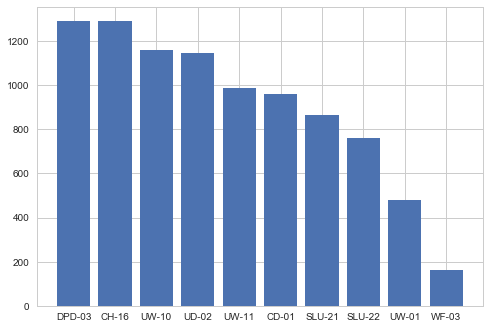

        from_station_id
DPD-03             1290
CH-16              1288
UW-10              1160
UD-02              1147
UW-11               988
CD-01               958
SLU-21              863
SLU-22              761
UW-01               480
WF-03               160


In [98]:
plt.bar([i for i in range(len(cycle_share.from_station_id.value_counts()[-10:]))], 
        cycle_share.from_station_id.value_counts()[-10:], 
        align='center')
plt.xticks([i for i in range(len(cycle_share.from_station_id.value_counts()[-10:]))], 
           cycle_share.from_station_id.value_counts()[-10:].index)
plt.show()
print(pd.DataFrame(cycle_share.from_station_id.value_counts()[-10:]))

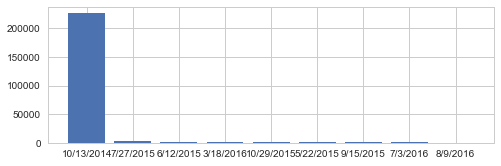

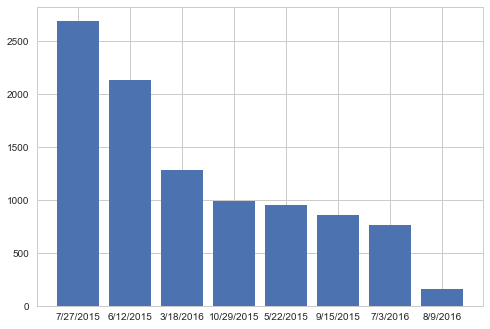

10/13/2014    226215
7/27/2015       2693
6/12/2015       2134
3/18/2016       1288
10/29/2015       988
5/22/2015        958
9/15/2015        863
7/3/2016         761
8/9/2016         160
Name: install_date, dtype: int64


In [106]:
plt.subplot(211)
plt.bar([i for i in range(len(cycle_share.install_date.value_counts()))], 
        cycle_share.install_date.value_counts(), 
        align='center')
plt.xticks([i for i in range(len(cycle_share.install_date.value_counts()))], 
           cycle_share.install_date.value_counts().index)
plt.show()
plt.bar([i for i in range(len(cycle_share.install_date.value_counts()[1:]))], 
        cycle_share.install_date.value_counts()[1:], 
        align='center')
plt.xticks([i for i in range(len(cycle_share.install_date.value_counts()[1:]))], 
           cycle_share.install_date.value_counts()[1:].index)
plt.show()
print(cycle_share.install_date.value_counts())

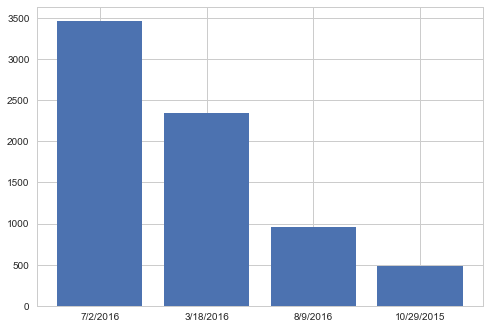

7/2/2016      3461
3/18/2016     2349
8/9/2016       958
10/29/2015     480
Name: decommission_date, dtype: int64


In [110]:
plt.bar([i for i in range(len(cycle_share.decommission_date.value_counts()))], 
        cycle_share.decommission_date.value_counts(), 
        align='center')
plt.xticks([i for i in range(len(cycle_share.decommission_date.value_counts()))], 
           cycle_share.decommission_date.value_counts().index)
plt.show()
print(cycle_share.decommission_date.value_counts())

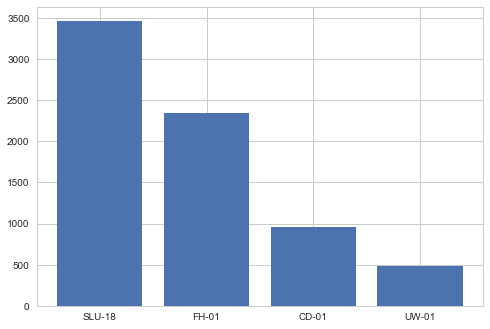

SLU-18    3461
FH-01     2349
CD-01      958
UW-01      480
Name: station_id, dtype: int64


In [111]:
plt.bar([i for i in range(len(cycle_share['station_id'][cycle_share.decommission_date > 0].value_counts()))], 
        cycle_share['station_id'][cycle_share.decommission_date > 0].value_counts(), 
        align='center')
plt.xticks([i for i in range(len(cycle_share['station_id'][cycle_share.decommission_date > 0].value_counts()))], 
           cycle_share['station_id'][cycle_share.decommission_date > 0].value_counts().index)
plt.show()
print(cycle_share['station_id'][cycle_share.decommission_date > 0].value_counts())

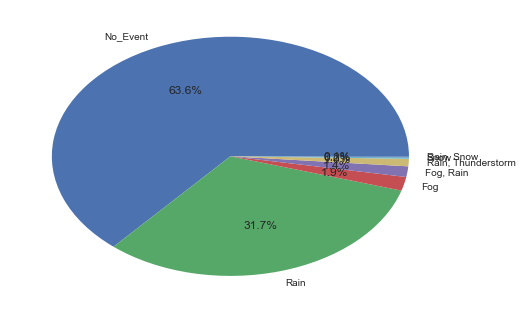

No_Event              150234
Rain                   74888
Fog                     4402
Fog, Rain               3371
Rain, Thunderstorm      2387
Snow                     463
Rain, Snow               315
Name: Events, dtype: int64


In [126]:
Events_pie = cycle_share['Events'].replace(value=['No_Event', 'Rain', 'Fog', 'Fog, Rain', 'Fog, Rain',
                                     'Rain, Thunderstorm', 'Rain, Thunderstorm', 'Snow', 
                                     'Rain, Snow', 'Rain, Snow'], 
                              to_replace=list(cycle_share['Events'].value_counts().index))
plt.pie(Events_pie.value_counts(), 
        labels=Events_pie.value_counts().index, 
        autopct='%1.1f%%')
plt.show()
print(Events_pie.value_counts())

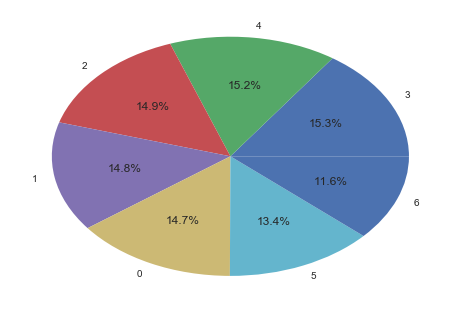

3    36122
4    35826
2    35263
1    35020
0    34704
5    31724
6    27401
Name: day, dtype: int64


In [142]:
plt.pie(cycle_share['day'].value_counts(), 
        labels=cycle_share['day'].value_counts().index, 
        autopct='%1.1f%%')
plt.show()
print(cycle_share['day'].value_counts())

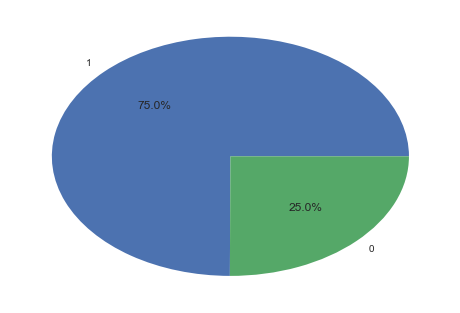

1    176935
0     59125
Name: weekend, dtype: int64


In [143]:
plt.pie(cycle_share['weekend'].value_counts(), 
        labels=cycle_share['weekend'].value_counts().index, 
        autopct='%1.1f%%')
plt.show()
print(cycle_share['weekend'].value_counts())

In [3]:
from_station_id = pd.DataFrame(cycle_share.from_station_id.value_counts()).reset_index()

In [4]:
from_station_id.columns = ['from_station_id', 'number_of_use']

In [48]:
station_use = pd.merge(from_station_id, cycle_share[['from_station_id', 'from_station_area', 'lat','long']], how='inner', on ='from_station_id')

In [50]:
station_use = station_use[~station_use.duplicated()]

In [87]:
color_list = ['rgb(255, 0, 0)', 'rgb(255, 128, 0)', 'rgb(255, 255, 0)', \
              'rgb(128, 255, 0)', 'rgb(0, 255, 0)', 'rgb(0, 255, 128)', \
              'rgb(0, 255, 255)', 'rgb(0, 128, 255)', 'rgb(0, 0, 255)', \
              'rgb(128, 0, 255)', 'rgb(255, 0, 255)',  'rgb(255, 0, 128)',\
              'rgb(128 ,128, 128)']        

In [86]:
mapbox_access_token = 'pk.eyJ1Ijoic2hpbnYxMjM0IiwiYSI6ImNqMW9zODkxdDAwYnQzNXJ3M2pkbmE0aG0ifQ.BUYjGALlIsUfV1dpJV9fxw'


data = plotly.graph_objs.Data([
    plotly.graph_objs.Scattermapbox(
        lat = station_use['lat'],
        lon = station_use['long'],
        mode='markers',
        marker=plotly.graph_objs.Marker(
            size= station_use['number_of_use'] *0.003, 
            color = station_use.from_station_area.replace(to_replace=list(station_use.from_station_area.unique()),
                                      value=color_list)
        ),
        text=station_use['from_station_id'],
    )
])
layout = plotly.graph_objs.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat = np.mean(station_use['lat']),
            lon = np.mean(station_use['long'])
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='Multiple Mapbox')
plotly.offline.iplot(fig, filename='Multiple Mapbox')

In [82]:
station_use

,from_station_id,number_of_use,from_station_area,lat,long
0,WF-01,11274,WF,47.614315,-122.354093
11274,CH-07,9466,CH,47.615330,-122.311752
20740,BT-01,9392,BT,47.618418,-122.350964
30132,CBD-13,8198,CBD,47.610185,-122.339641
38330,SLU-15,8188,SLU,47.613628,-122.337341
46518,CH-08,7690,CH,47.615486,-122.318245
54208,CH-02,7685,CH,47.622063,-122.321251
61893,BT-03,6568,BT,47.615829,-122.348564
68461,SLU-19,6402,SLU,47.622277,-122.355230
74863,SLU-01,6401,SLU,47.619859,-122.330304
